In [1]:
# import the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [41]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/00/5a/f43bad68b31269a72bdd66102732ea4473e98f421ee9f71379e35dcb56f5/xgboost-3.0.5-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB 640.0 kB/s eta 0:01:29
   ---------------------------------------- 0.0/56.8 MB 653.6 kB/s eta 0:01:27
   ---------------------------------------- 0.3/56.8 MB 3.0 MB/s eta 0:00:19
    --------------------------------------- 0.7/56.8 MB 4.5 MB/s eta 0:00:13
    --------------------------------------- 1.0/56.8 MB 4.8 MB/s eta 0:00:12
    --------------------------------------- 1.3/56.8 MB 5.0 MB/s eta 0:00:12
   - -------------------------------------- 1.6/56.8 MB 5.2 MB/s eta 0:00:11
   - -------------------------------------- 1.8/56.8 MB 5.2 MB/s eta 0:00:11
   - -------------------------------------- 2.1/56.8 MB 5.4 MB/s eta 0:00:11
   - -----------------------

In [23]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [24]:
import lightgbm as lgb
import xgboost as xgb#this libarary was not install so i can install it then again import it.

In [25]:
# import the dataset there are two dataset. so we can concatenate
# Load datasets
df1 = pd.read_csv("D:\Titanic_test.csv")
df2 = pd.read_csv("D:\Titanic_train.csv")

In [26]:
# Concatenate vertically
data = pd.concat([df1, df2], axis=0, ignore_index=True)

In [27]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [28]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [29]:
# check the missing values
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [31]:
# there are missing values in age,cabin and survived column
# so we can replace with mean , median and mode
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)
data['Survived'].fillna(data['Survived'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)



In [32]:
# lets check again
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [33]:
print(data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


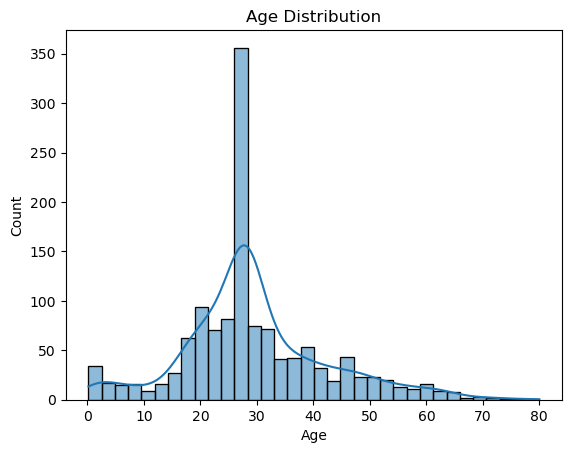

In [34]:
# visulization tech
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


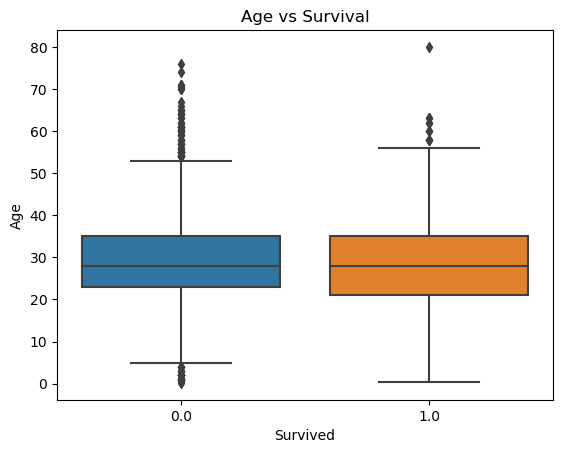

In [35]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survival')
plt.show()

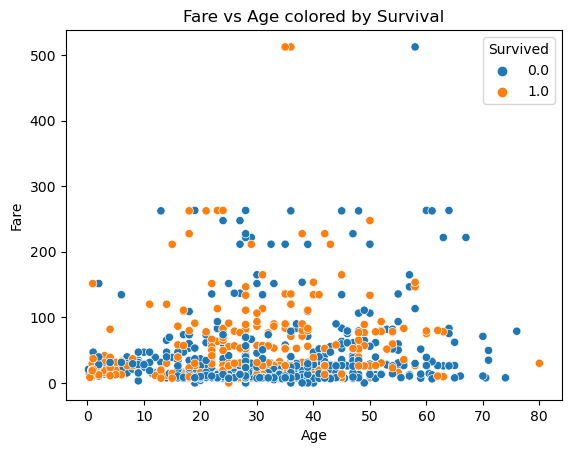

In [36]:
# Scatter plot for Fare vs Age
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Fare vs Age colored by Survival')
plt.show()

In [43]:
# Drop irrelevant columns if they exist
cols_to_drop = ['Cabin', 'Name', 'Ticket']
data.drop([col for col in cols_to_drop if col in data.columns], axis=1, inplace=True)


In [47]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
if 'Embarked' in data.columns:
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)


In [48]:
# Encode categorical columns
if 'Sex' in data.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data['Sex'] = le.fit_transform(data['Sex'])


In [50]:
if 'Embarked' in data.columns:
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)


In [51]:
# split the data into x and y
# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [52]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# building the models
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 264, number of negative: 783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252149 -> initscore=-1.087184
[LightGBM] [Info] Start training from score -1.087184
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [54]:
# Predictions
y_pred_lgb = lgb_model.predict(X_test)

In [55]:
# evaluation the model
# Evaluation
print("LightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1-score:", f1_score(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))

LightGBM Performance:
Accuracy: 0.8664122137404581
Precision: 0.7945205479452054
Recall: 0.7435897435897436
F1-score: 0.7682119205298014
[[169  15]
 [ 20  58]]


In [56]:
# know build the second model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


C:\Users\soham\New folder\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:28:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [57]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [58]:
# Evaluation
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Performance:
Accuracy: 0.8625954198473282
Precision: 0.8
Recall: 0.717948717948718
F1-score: 0.7567567567567568
[[170  14]
 [ 22  56]]


In [59]:
# compare the performance the both the model
performance = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'LightGBM': [accuracy_score(y_test, y_pred_lgb),
                 precision_score(y_test, y_pred_lgb),
                 recall_score(y_test, y_pred_lgb),
                 f1_score(y_test, y_pred_lgb)],
    'XGBoost': [accuracy_score(y_test, y_pred_xgb),
                precision_score(y_test, y_pred_xgb),
                recall_score(y_test, y_pred_xgb),
                f1_score(y_test, y_pred_xgb)]
})


In [60]:
print(performance)

      Metric  LightGBM   XGBoost
0   Accuracy  0.866412  0.862595
1  Precision  0.794521  0.800000
2     Recall  0.743590  0.717949
3   F1-score  0.768212  0.756757


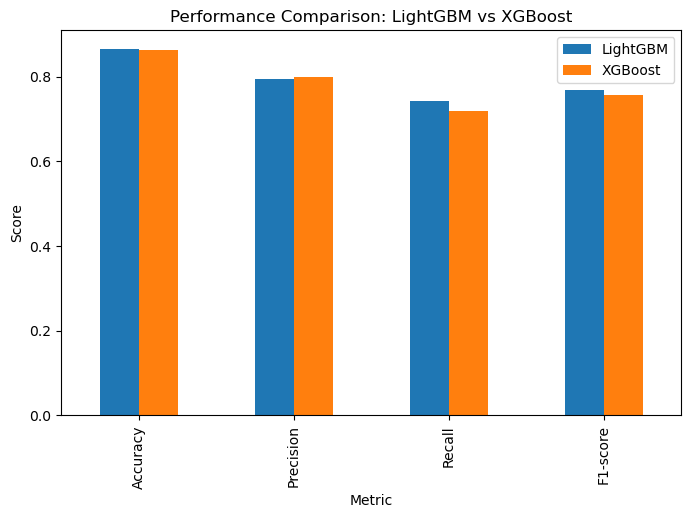

In [61]:
# visualize the model
# Bar plot comparison
performance.set_index('Metric').plot(kind='bar', figsize=(8,5))
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.show()